**Part 1**

**Student Name:** **Mwebaze Junior**

In [18]:
!pip install "pandas<2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [1]:
#install joblib
!pip install joblib pandas

In [15]:
#imports
import joblib
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
SEED = 321
np.random.seed(SEED)

In [11]:
# Add a new folder to week 13 file structure
import os
os.makedirs('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/',exist_ok=True)



In [12]:
# Confirm created folder
os.listdir('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/')


['Autompg']

In [13]:
# Add Autompg subfolder to Models
os.makedirs('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/Autompg',exist_ok=True)
# Confirm created folder
os.listdir('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/Autompg')



[]

In [17]:
# Import necessary libraries
import joblib

# Load the saved_model.joblib file from Google Drive
file_path = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib'
data = joblib.load(file_path)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib'

In [36]:
# Display the keys of the dictionary stored in the joblib file
print(data.keys())

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor'])


In [37]:
# Print the number of elements in the loaded model
print(len(data))

6


In [46]:
#check if there is linear data
if 'LinearRegression' in data:
    print("Key 'LinearRegression' exists in the dictionary.")
else:
    print("Key 'LinearRegression' does not exist in the dictionary.")
    print("Available keys:", data.keys())

Key 'LinearRegression' does not exist in the dictionary.
Available keys: dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor'])


In [47]:
# Loading data and objects as separate variables
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
preprocessor = data['preprocessor']
#LinearRegression = data['LinearRegression']
RandomForestRegressor = data['RandomForestRegressor']

In [49]:
#saving variables.
import joblib
# creating a dictionary of all of the variables
export = {'X_train':X_train,
         'y_train': y_train,
         'X_test':X_test,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForestRegressor':RandomForestRegressor}


In [50]:
# saving the export dict as a joblib file--saving to new Models/Autompg folder
joblib.dump(export, '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib')

['/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib']

In [51]:
# Confirm the file was saved by loading it back in
loaded = joblib.load('/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Data Viz Belt Exam OptionA/saved_model.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor'])

In [52]:
# Loading data and objects
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
RandomForestRegressor = loaded['RandomForestRegressor']

In [54]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed
X_test_processed

array([[1.3860e+04, 7.5000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [8.4050e+03, 5.0000e+01, 8.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.1310e+04, 7.5000e+01, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [4.7007e+04, 1.2300e+02, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.0800e+04, 6.0000e+01, 7.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.1900e+03, 5.0000e+01, 5.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [63]:
X_train.columns = preprocessor.get_feature_names_out()
X_test.columns = preprocessor.get_feature_names_out()
X_train
X_test

ValueError: Length mismatch: Expected axis has 8 elements, new values have 11 elements

In [56]:
# Get the new feature names from the preprocessor
new_columns = preprocessor.get_feature_names_out()

# Assign the new column names, ensuring the number of columns match
X_train.columns = new_columns[:len(X_train.columns)]  # Select first 8 columns
X_test.columns = new_columns[:len(X_test.columns)]   # Select first 8 columns

# Display the DataFrames with updated column names
print(X_train)
print(X_test)

      Lot Area  Lot Frontage  Overall Cond  Total Bsmt SF Gr Liv Area  \
853      16269           NaN             5          907.0           Y   
1055     13891         107.0             5         1710.0           Y   
2483      8900           NaN             4         1056.0           Y   
2351     11475          85.0             6          713.0           Y   
1700     13654         118.0             5         1704.0           Y   
...        ...           ...           ...            ...         ...   
1425     11778          91.0             5         2271.0           Y   
1833     10678          85.0             5         1683.0           Y   
2847     10890          60.0             5         1058.0           Y   
124       8800          80.0             7          936.0           Y   
2586      7700          55.0             7          301.0           Y   

      TotRms AbvGrd  Central Air_Y Land Contour_Bnk  
853             907              5              Lvl  
1055           

In [58]:
#Extract the coefficients and save them as a Series with the correct feature names as the index.
#LinearRegression.coef_

In [59]:
import pandas as pd
coefficients = [1.10428754e-01, 8.79663271e+01, 1.41612957e+01, 6.07389601e+01, 1.03864442e+02, -7.38974003e+03, 3.42004104e+04, -3.04921243e+04]

# Create a Series with coefficients
coefficients_series = pd.Series(coefficients)

# Print or use the coefficients Series
print(coefficients_series)

0        0.110429
1       87.966327
2       14.161296
3       60.738960
4      103.864442
5    -7389.740030
6    34200.410400
7   -30492.124300
dtype: float64


In [60]:
#Change the pandas option for float format to display the coefficients with pandas in a readable comma separator for thousands and 2 decimal places.
pd.options.display.float_format = '{:,.2f}'.format
coefficients_series

0         0.11
1        87.97
2        14.16
3        60.74
4       103.86
5    -7,389.74
6    34,200.41
7   -30,492.12
dtype: float64

In [61]:
#Extract and create a bar graph of the feature importances, sorted from largest to smallest.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

sorted_feature_importances = RandomForestRegressor.feature_importances_
sorted_feature_names = X_train.columns

# Sort the feature importances and feature names together
sorted_indices = np.argsort(sorted_feature_importances)[::-1]
sorted_feature_importances = sorted_feature_importances[sorted_indices]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (11,).

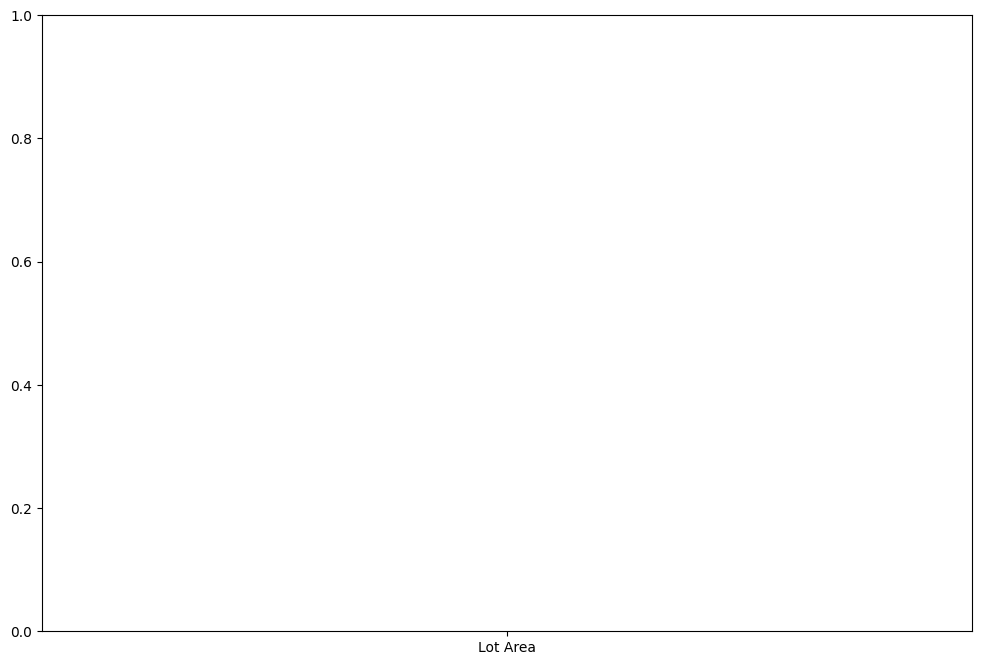

In [62]:
#sort the coefficeints by magnitude
sorted_feature_importances = np.abs(sorted_feature_importances)
# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Features')
# Changed the ylabel variable name to avoid conflict
plt.ylabel('Feature Importances (Sorted)')
plt.title('Feature Importances (Sorted)')
plt.xticks(rotation=70)
plt.show()

In [64]:
#Extract and create a bar graph of the feature importances, sorted from largest to smallest.
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'RandomForestRegressor' and 'X_train' are defined in your environment

sorted_feature_importances = RandomForestRegressor.feature_importances_
sorted_feature_names = X_train.columns

# Sort the feature importances and feature names together
sorted_indices = np.argsort(sorted_feature_importances)[::-1]
sorted_feature_importances = sorted_feature_importances[sorted_indices]
sorted_feature_names = sorted_feature_names[sorted_indices] # Add this line to sort feature names

#sort the coefficeints by magnitude
sorted_feature_importances = np.abs(sorted_feature_importances)

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Feature Importances (Sorted)')
plt.title('Feature Importances (Sorted)')
plt.xticks(rotation=70)
plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 8

What are the top 4 most important features?

In [ ]:
top_4_features = sorted_feature_names[:4]
top_4_features

Index(['Lot Area', 'Lot Frontage', 'Overall Cond', 'Total Bsmt SF'], dtype='object')

**Of the top 4 most important features, identify which of these features also appeared in the 4 largest positive or 2 largest negative coefficients.**

In [ ]:

four_largest = coefficients_series.nlargest(4)
four_largest

6   34,200.41
4      103.86
1       87.97
3       60.74
dtype: float64

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
#Apply Shap to Explain the Random Forest Model
shap_values = shap.TreeExplainer(RandomForestRegressor).shap_values(X_train_processed)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [-2.53328104e+03, -8.59174751e+03,  1.56986508e+03, ...,
         7.46540789e+02,  1.42280489e+03,  1.94301039e+01],
       [-1.61177112e+03,  1.25997349e+03,  6.80557709e+02, ...,
         8.63799268e+02,  1.75197910e+03,  6.79061972e+01],
       [-1.14226838e+03, -1.36346517e+03,  1.65453146e+03, ...,
         9.64277083e+02,  2.08409374e+03,  1.30955576e+02]])

Sample 500 rows of the processed X_train data as X_shap, using random_state=321

In [ ]:

X_shap = X_train_processed[:500]
X_shap

array([[1.62690000e+04, 6.92306849e+01, 5.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.38910000e+04, 1.07000000e+02, 5.00000000e+00, ...,
        6.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.90000000e+03, 6.92306849e+01, 4.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.46010000e+04, 8.50000000e+01, 5.00000000e+00, ...,
        8.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.58100000e+04, 5.90000000e+01, 5.00000000e+00, ...,
        7.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.50000000e+03, 6.30000000e+01, 5.00000000e+00, ...,
        6.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

Save the corresponding y_train values as y_shap

In [ ]:
y_shap = y_train[:500]
y_shap

853     140000
1055    372402
2483    107000
2351    179900
1700    418000
         ...  
2137    134900
1588    209200
967     315000
1727    181755
534     152000
Name: SalePrice, Length: 500, dtype: int64

Create a shap model explainer for the random forest model

In [ ]:
shap_explainer = shap.TreeExplainer(RandomForestRegressor)
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [ 1.32021730e+04,  3.19404871e+03,  3.90404029e+03, ...,
        -2.34065312e+03,  1.56775049e+03,  1.82525488e+01],
       [ 8.01264523e+03, -1.65601039e+03,  4.80796101e+03, ...,
         1.16500946e+02,  1.99195931e+03,  5.01981063e+01],
       [-1.24667459e+03,  4.57401356e+02,  1.91706988e+03, ...,
         6.84586429e+02,  1.80481749e+03,  2.88628720e+01]])

Calculate the shap values for the sampled data

In [ ]:
shap_values = shap_explainer.shap_values(X_shap)
shap_values

array([[ 5.78345776e+03,  9.74391789e+02,  1.97750764e+02, ...,
         1.18909580e+03,  1.71630555e+03,  1.20059452e+02],
       [ 8.10396016e+03,  1.71905434e+04,  3.18441259e+03, ...,
         1.07394305e+04,  1.38132902e+03,  1.81434681e+01],
       [-2.39606667e+03,  1.17828136e+01, -2.30306153e+04, ...,
        -1.71282164e+02,  1.89559729e+03,  3.77254410e+01],
       ...,
       [ 1.32021730e+04,  3.19404871e+03,  3.90404029e+03, ...,
        -2.34065312e+03,  1.56775049e+03,  1.82525488e+01],
       [ 8.01264523e+03, -1.65601039e+03,  4.80796101e+03, ...,
         1.16500946e+02,  1.99195931e+03,  5.01981063e+01],
       [-1.24667459e+03,  4.57401356e+02,  1.91706988e+03, ...,
         6.84586429e+02,  1.80481749e+03,  2.88628720e+01]])

Create a summary plot (plot_type=’dot’) of the most important features, according to shap.

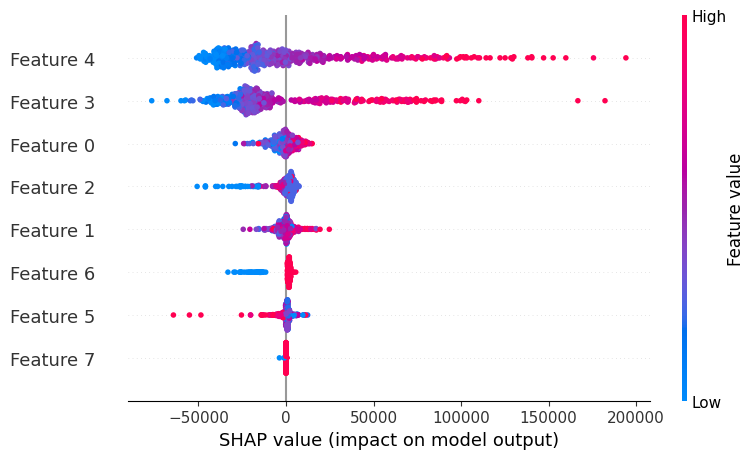

In [ ]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')

**Part 2**

Load the provided csv, located in the zip file you downloaded in Part 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
# Load the saved_model.joblib file from Google Drive
file_path = '/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/zillow_home_values-zipcode.csv'
df = pd.read_csv(file_path)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"


In [ ]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
31072022      float64
31082022      float64
30092022      float64
31102022      float64
30112022      float64
Length: 284, dtype: object

In [ ]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '31012000',
       ...
       '28022022', '31032022', '30042022', '31052022', '30062022', '31072022',
       '31082022', '30092022', '31102022', '30112022'],
      dtype='object', length=284)

In [ ]:
# Melt columns containing '20' in their names
melted_df = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName'],
                    value_vars=[col for col in df.columns if '20' in col],
                    var_name='Date', value_name='Value')

# Display the melted DataFrame
print(melted_df)

         RegionID  SizeRank  RegionName StateName      Date      Value
0           91940         0       77449        TX  31012000 107,261.00
1           91982         1       77494        TX  31012000 222,569.00
2           93144         2       79936        TX  31012000  90,009.00
3           62080         3       11368        NY  31012000 188,096.00
4           62093         4       11385        NY  31012000 275,983.00
...           ...       ...         ...       ...       ...        ...
7546545     80190     30657       50160        IA  30112022 193,591.00
7546546     65355     30657       18081        PA  30112022 376,523.00
7546547     82217     30657       55366        MN  30112022 110,082.00
7546548     80581     30657       51009        IA  30112022  75,810.00
7546549     65963     30657       19490        PA  30112022 623,590.00

[7546550 rows x 6 columns]


In [ ]:
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,Value
0,91940,0,77449,TX,31012000,"107,261.00"
1,91982,1,77494,TX,31012000,"222,569.00"
2,93144,2,79936,TX,31012000,"90,009.00"
3,62080,3,11368,NY,31012000,"188,096.00"
4,62093,4,11385,NY,31012000,"275,983.00"


In [ ]:
melted_df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
StateName      object
Date           object
Value         float64
dtype: object

In [ ]:
# Convert the strings to datetime objects
melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%d%m%Y')
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Date,Value
0,91940,0,77449,TX,2000-01-31,"107,261.00"
1,91982,1,77494,TX,2000-01-31,"222,569.00"
2,93144,2,79936,TX,2000-01-31,"90,009.00"
3,62080,3,11368,NY,2000-01-31,"188,096.00"
4,62093,4,11385,NY,2000-01-31,"275,983.00"


In [ ]:
melted_df.dtypes

RegionID               int64
SizeRank               int64
RegionName             int64
StateName             object
Date          datetime64[ns]
Value                float64
dtype: object

In [ ]:
melted_df = melted_df.set_index('Date')
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2000-01-31,91940,0,77449,TX,"107,261.00"
2000-01-31,91982,1,77494,TX,"222,569.00"
2000-01-31,93144,2,79936,TX,"90,009.00"
2000-01-31,62080,3,11368,NY,"188,096.00"
2000-01-31,62093,4,11385,NY,"275,983.00"


In [ ]:
#filter specific states from the statename
melted_df = melted_df[melted_df['StateName'].isin(['MA', 'PA', 'NY', 'NJ', 'MD'])]
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2000-01-31,62080,3,11368,NY,"188,096.00"
2000-01-31,62093,4,11385,NY,"275,983.00"
2000-01-31,61148,10,8701,NJ,"164,311.00"
2000-01-31,62046,11,11236,NY,"211,331.00"
2000-01-31,62019,14,11208,NY,"204,616.00"


In [ ]:
# Filter the DataFrame to keep only rows between 2008 and 2018 inclusive
melted_df = melted_df["2008":"2018"]

# Print the filtered DataFrame
melted_df.head()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2008-01-31,62080,3,11368,NY,"447,718.00"
2008-01-31,62093,4,11385,NY,"538,860.00"
2008-01-31,61148,10,8701,NJ,"358,246.00"
2008-01-31,62046,11,11236,NY,"468,185.00"
2008-01-31,62019,14,11208,NY,"486,673.00"


In [ ]:
melted_df.tail()

,RegionID,SizeRank,RegionName,StateName,Value
Date,,,,,
2018-12-31,62607,30657,12489,NY,"141,646.00"
2018-12-31,64515,30657,16245,PA,"55,216.00"
2018-12-31,65172,30657,17762,PA,NaN
2018-12-31,65355,30657,18081,PA,NaN
2018-12-31,65963,30657,19490,PA,NaN


In [ ]:
# Resample to yearly frequency using mean as the aggregation function
yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()

yearly_mean_home_values

<ipython-input-184-f15e60a43281>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()
<ipython-input-184-f15e60a43281>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_home_values = melted_df.groupby('StateName').resample('Y').mean()
<ipython-input-184-f15e60a43281>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mean_home_va

RegionID  SizeRank  RegionName      Value
StateName Date                                                 
MA        2008-12-31 58,542.19 11,144.98    1,874.83 370,276.13
          2009-12-31 58,542.19 11,144.98    1,874.83 353,451.30
          2010-12-31 58,542.19 11,144.98    1,874.83 354,704.04
          2011-12-31 58,542.19 11,144.98    1,874.83 344,022.05
          2012-12-31 58,542.19 11,144.98    1,874.83 337,760.41
          2013-12-31 58,542.19 11,144.98    1,874.83 358,073.75
          2014-12-31 58,542.19 11,144.98    1,874.83 378,459.69
          2015-12-31 58,542.19 11,144.98    1,874.83 393,671.95
          2016-12-31 58,542.19 11,144.98    1,874.83 407,772.94
          2017-12-31 58,542.19 11,144.98    1,874.83 427,188.85
          2018-12-31 58,542.19 11,144.98    1,874.83 450,979.54
MD        2008-12-31 66,810.87 13,259.26   21,245.92 359,630.33
          2009-12-31 66,810.87 13,259.26   21,245.92 319,528.86
          2010-12-31 66,810.87 13,259.26   21,245.92 305,117.95
          2011-12-31 66,810.87 13,259.26   21,245.92 291,514.46
          2012-12-31 66,810.87 13,259.26   21,245.92 284,355.91
          2013-12-31 66,810.87 13,259.26   21,245.92 296,858.04
          2014-12-31 66,810.87 13,259.26   21,245.92 306,695.24
          2015-12-31 66,810.87 13,259.26   21,245.92 306,827.05
          2016-12-31 66,810.87 13,259.26   21,245.92 308,879.07
          2017-12-31 66,810.87 13,259.26   21,245.92 317,503.22
          2018-12-31 66,810.87 13,259.26   21,245.92 327,619.58
NJ        2008-12-31 60,875.61 10,151.58    7,925.83 419,298.05
          2009-12-31 60,875.61 10,151.58    7,925.83 392,674.67
          2010-12-31 60,875.61 10,151.58    7,925.83 379,620.17
          2011-12-31 60,875.61 10,151.58    7,925.83 358,189.41
          2012-12-31 60,875.61 10,151.58    7,925.83 341,947.98
          2013-12-31 60,875.61 10,151.58    7,925.83 346,531.07
          2014-12-31 60,875.61 10,151.58    7,925.83 361,237.88
          2015-12-31 60,875.61 10,151.58    7,925.83 362,191.10
          2016-12-31 60,875.61 10,151.58    7,925.83 364,417.33
          2017-12-31 60,875.61 10,151.58    7,925.83 373,991.76
          2018-12-31 60,875.61 10,151.58    7,925.83 388,572.46
NY        2008-12-31 63,176.34 14,641.25   12,724.88 295,154.78
          2009-12-31 63,176.34 14,641.25   12,724.88 278,740.46
          2010-12-31 63,176.34 14,641.25   12,724.88 271,226.92
          2011-12-31 63,176.34 14,641.25   12,724.88 267,413.73
          2012-12-31 63,176.34 14,641.25   12,724.88 263,891.64
          2013-12-31 63,176.34 14,641.25   12,724.88 270,369.31
          2014-12-31 63,176.34 14,641.25   12,724.88 284,347.55
          2015-12-31 63,176.34 14,641.25   12,724.88 296,118.28
          2016-12-31 63,176.34 14,641.25   12,724.88 303,402.83
          2017-12-31 63,176.34 14,641.25   12,724.88 313,697.02
          2018-12-31 63,176.34 14,641.25   12,724.88 327,252.61
PA        2008-12-31 66,345.55 15,209.64   17,182.52 196,780.89
          2009-12-31 66,345.55 15,209.64   17,182.52 175,373.03
          2010-12-31 66,345.55 15,209.64   17,182.52 170,814.76
          2011-12-31 66,345.55 15,209.64   17,182.52 162,272.05
          2012-12-31 66,345.55 15,209.64   17,182.52 157,486.61
          2013-12-31 66,345.55 15,209.64   17,182.52 158,731.09
          2014-12-31 66,345.55 15,209.64   17,182.52 161,301.36
          2015-12-31 66,345.55 15,209.64   17,182.52 162,618.03
          2016-12-31 66,345.55 15,209.64   17,182.52 163,920.96
          2017-12-31 66,345.55 15,209.64   17,182.52 167,865.80
          2018-12-31 66,345.55 15,209.64   17,182.52 175,347.29

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

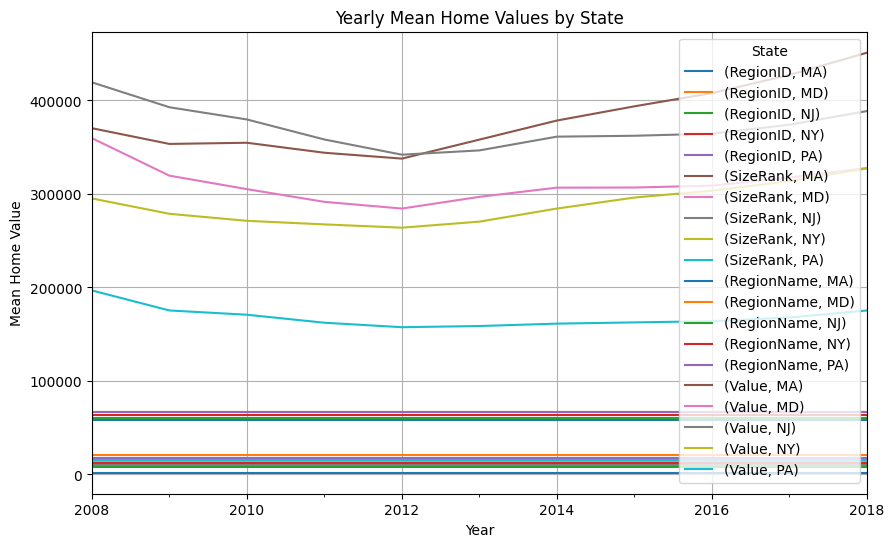

In [ ]:
# Resample to yearly frequency using mean as the aggregation function
yearly_mean_home_values = melted_df.groupby(['StateName', pd.Grouper(freq='Y')]).mean().unstack(level=0)

# Plotting
yearly_mean_home_values.plot(kind='line', figsize=(10, 6))

plt.title('Yearly Mean Home Values by State')
plt.xlabel('Year')
plt.ylabel('Mean Home Value')
plt.grid(True)
plt.legend(title='State')
plt.show()

In [ ]:
# Melt columns containing '20' in their names
melted_df2 = pd.melt(df, id_vars=['RegionID','SizeRank','RegionName','StateName','State','City','Metro','CountyName'],
                    value_vars=[col for col in df.columns if '20' in col],
                    var_name='Date', value_name='Value')

# Display the melted DataFrame
print(melted_df2)

         RegionID  SizeRank  RegionName StateName State          City  \
0           91940         0       77449        TX    TX           NaN   
1           91982         1       77494        TX    TX           NaN   
2           93144         2       79936        TX    TX       El Paso   
3           62080         3       11368        NY    NY      New York   
4           62093         4       11385        NY    NY      New York   
...           ...       ...         ...       ...   ...           ...   
7546545     80190     30657       50160        IA    IA   Martensdale   
7546546     65355     30657       18081        PA    PA    Hellertown   
7546547     82217     30657       55366        MN    MN           NaN   
7546548     80581     30657       51009        IA    IA       Calumet   
7546549     65963     30657       19490        PA    PA  Collegeville   

                                               Metro         CountyName  \
0               Houston-The Woodlands-Sugar Land

In [ ]:
# Convert the strings to datetime objects
melted_df2['Date'] = pd.to_datetime(melted_df2['Date'], format='%d%m%Y')
melted_df2.head()

,RegionID,SizeRank,RegionName,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"107,261.00"
1,91982,1,77494,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,"222,569.00"
2,93144,2,79936,TX,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,"90,009.00"
3,62080,3,11368,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"188,096.00"
4,62093,4,11385,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"275,983.00"


In [ ]:
melted_df2.head()

,RegionID,SizeRank,RegionName,StateName,State,City,Metro,CountyName,Date,Value
0,91940,0,77449,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"107,261.00"
1,91982,1,77494,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2000-01-31,"222,569.00"
2,93144,2,79936,TX,TX,El Paso,"El Paso, TX",El Paso County,2000-01-31,"90,009.00"
3,62080,3,11368,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"188,096.00"
4,62093,4,11385,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"275,983.00"


In [ ]:
# Define the file path
file_path = "/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/Data/data-for-tableau.csv"
#/content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB
# Save the DataFrame as a CSV file
melted_df2.to_csv(file_path, index=False)

print("DataFrame saved as CSV file:", file_path)

DataFrame saved as CSV file: /content/drive/MyDrive/Colab data uploads/Data Viz Belt Exam - OptionB/Data/data-for-tableau.csv


**Part 3**

https://public.tableau.com/app/profile/victoria.katusabe/viz/BeltExamPart3KatusabeVictoria/Createachoroplethmapofthemedianhomevaluebyzipcode?publish=yes